In [52]:
import cv2
import matplotlib.pyplot as plt

In [53]:
cap = cv2.VideoCapture('http://192.168.1.131:56000/mjpeg')

In [54]:
status, img = cap.read()

In [55]:
# Gorde nahi izatekotan
# cv2.imwrite('../output/photo.jpg', img) 

In [56]:
# Hace fallar el kernel con esta configuraci´pn
# cv2.imshow('hi', photo)

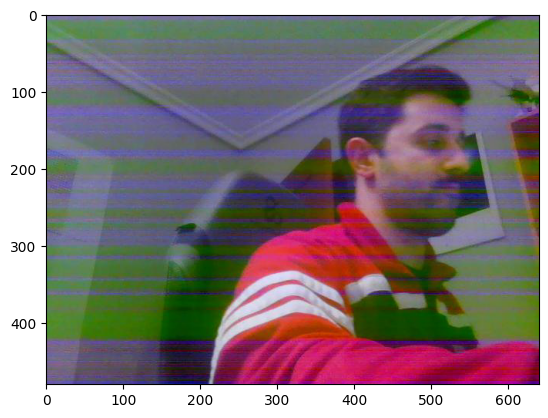

In [57]:
# Para mostrar la imagen con matplot lib
plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

In [58]:
# https://www.datacamp.com/tutorial/face-detection-python-opencv
# Fijaros que es un array de tres
img.shape

(480, 640, 3)

In [59]:
# Reducimos las dimensiones del array transformadolo a escala de grises
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [60]:
gray_image.shape

(480, 640)

In [61]:
# Cargar el clasificador
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [62]:
# Face classifyer
face = face_classifier.detectMultiScale(
    gray_image, minNeighbors=5, minSize=(120, 180)
)

detectMultiScale():
    El método detectMultiScale() se utiliza para identificar caras de diferentes tamaños en la imagen de entrada.

grey_image:
    El primer parámetro en este método se llama grey_image, que es la imagen en escala de grises que creamos anteriormente.

scaleFactor:
    Este parámetro se utiliza para reducir el tamaño de la imagen de entrada para que sea más fácil para el algoritmo detectar caras más grandes. En este caso, hemos especificado un factor de escala de 1.1, lo que indica que queremos reducir el tamaño de la imagen en un 10%.

minNeighbors:
    El clasificador en cascada aplica una ventana deslizante a través de la imagen para detectar caras en ella. Puedes pensar en estas ventanas como rectángulos.

    Inicialmente, el clasificador capturará un gran número de falsos positivos. Estos se eliminan utilizando el parámetro minNeighbors, que especifica el número de rectángulos vecinos que deben identificarse para que un objeto se considere una detección válida.

    Para resumir, pasar un valor pequeño como 0 o 1 a este parámetro resultaría en un alto número de falsos positivos, mientras que un número grande podría llevarnos a perder muchos verdaderos positivos.
    
    El truco aquí es encontrar un equilibrio que nos permita eliminar los falsos positivos mientras identificamos con precisión los verdaderos positivos.

minSize:
    Finalmente, el parámetro minSize establece el tamaño mínimo del objeto a detectar. El modelo ignorará las caras que sean más pequeñas que el tamaño mínimo especificad

In [63]:
# Dibuja un bounding box
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    

(-0.5, 639.5, 479.5, -0.5)

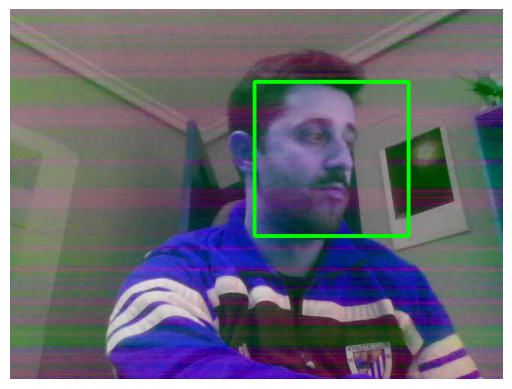

In [64]:
#muestra la imagen 
plt.imshow(img)
plt.axis('off')

In [65]:
# Press Enter to exit
cv2.destroyAllWindows()